# ToyMD

## How to run the exercises
Access the NVE version of the code on Moodle and unzip in the Ex5 folder in your noto repository. 

In [1]:
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("..")
import helpers
from helpers import *
helpers.set_style()

In [3]:
import numpy as np

# Exercises

## MD Initialization and Temperature

<div class="exercise admonition" name="5ex1" style="padding: 10px">
<p class="title">Exercise 1</p>
Implement the initialization described in the Theory section in our ToyMD code in `toy_md.py` in the section `##INITIALIZATION HERE##`. For this you should pick random velocities using `r.random.standard_normal((dim1,dim2))` which will produce random numbers between `0` and `1`. You need to shift this random gaussian distribution appropriately and then multiply it such that the width of the velocity distribution matches the kinetic energy at the target temperature. Use the variables `masses[i]` for the mass of particle `i` and Boltzmanns constant `0.00831415`. Remember that for each degree of freedom (e.g velocity in x direction) {eq}`equipart_x` holds.
</div>

<div class="exercise admonition" name="5ex2" style="padding: 10px">
<p class="title">Exercise 2</p>
Implement the Berendsen thermostat in the `toy_md.py` and `toy_md_integrate.py` (change the `compute_lambda_T` function) files. 
</div>

<div class="exercise admonition" name="5ex3" style="padding: 10px">
<p class="title">Exercise 3</p>
A better thermostat is the Andersen thermostat. It can be implemented as follows. Describe what problems this thermostat will present to us e.g for sampling of diffusion coefficients. What advantage does this thermostat have compared to the Berendsen thermostat?
</div>

``` python
#Andersen Thermostat
for i in range(N):
    if (r.random()<float(md_params["tau-T"])*float(md_params['time-step'])):# pick random particles according to nu
        sd=np.sqrt(0.00831415*float(md_params['time-step'])/masses[i])  # Velocity distribution at target temperature
        velocities[i]=0+np.random.randn(1,3)*sd # set new random velocities
```

## Force field


Now we can run a MD simulation in our desired NVT ensemble using our code on simple systems. Let's simulate a box of CO2 molecules. <br>
Investigate the `force_field.txt` file in the `carbon-dioxide` folder and then run a short molecular dynamics simulation using the following parameters:

```
number-of-steps  2000 # Number of integration time steps
time-step        0.001  # Integration time step (picoseconds)
temperature      50  # Simulation temperature
tau-T            0.05 # Temperature coupling time (picoseconds)
output-frequency  10   # Store coordinates every N steps

```

The simulation is run using 

    path/to/toy_md.py -c co2.pdb -p params.txt -f force_field.txt -o co2-traj.pdb -w co2-final.pdb

where `co2-traj.pdb` is a trajectory written each `output-frequency` steps and `co2-final.pdb` is the final geometry after the simulation has run the specified number of steps. 

<div class="exercise admonition" name="5ex4" style="padding: 10px">
<p class="title">Exercise 4</p>
Visualize the trajectory and visualize the distance of a C-O bond. Explain the flucations that you observe. What does the average value correspond to?
</div>

### Visualization of the trajectory

Here you can visualize the trajectory to see if your simulation is running correctly. A quick visualization often highlights if the parameters/simulation are correct.

In [4]:
import MDAnalysis

In [7]:
# ADJUST THE PATHS AS NECESSARY TO MATCH THE NAME OF YOUR FOLDERS
traj = MDAnalysis.Universe('./ToyMD/carbon-dioxide/traj.pdb')
show_trajectory(traj)

In [21]:
from scipy.spatial import distance


In [12]:
carbon = traj.select_atoms("resid 1 and name C")
oxygen1 = traj.select_atoms("resid 1 and name O1")

carbon = traj.select_atoms("resid 1 and name C")
oxygen2 = traj.select_atoms("resid 1 and name O2")

1.198167324066162

In [25]:
carbon_oxygen1_dist = []
carbon_oxygen2_dist = []
for ts in traj.trajectory:
    carbon_oxygen1_dist.append(distance.euclidean(carbon.positions, oxygen1.positions))
    carbon_oxygen2_dist.append(distance.euclidean(carbon.positions, oxygen2.positions))

forcefield = 0  #check force_field.txt in ToyMD folder for this value # modify here

In [ ]:
fig, ax =plt.subplots(1)

ax.plot(carbon_oxygen1_dist, label="C-O1")
ax.plot(carbon_oxygen2_dist, label="C-O2")
ax.axhline(forcefield, label="distance from forcefield")
ax.set_xlabel("timestep")
ax.set_ylabel(r'distance ($\AA$)')
ax.set_title('Distance')
ax.legend()

plt.show()

<div class="exercise admonition" name="5ex5" style="padding: 10px">
<p class="title">Exercise 5</p>
Visualize the radial distribution function of this system using below code. What do you observe?
</div>

### Compute RDF

We can use the `MDAnalysis` library to compute the radial distribution function.


In [46]:
carbons = traj.select_atoms("name O1")

In [53]:
import MDAnalysis.analysis as analysis

In [54]:
rdf = analysis.rdf.InterRDF(carbons, carbons)
rdf.run()

/opt/CompChem/psi4conda-1.5/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


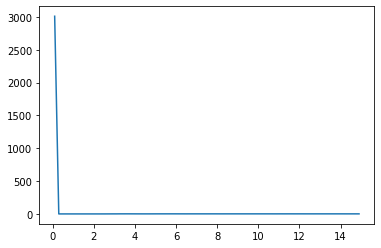

In [55]:
plt.plot(rdf.results.bins, rdf.results.rdf)


In [ ]:
# below the old RDF we used with a protein water system. 

In [ ]:
# select residues using :RES@atomname e.g :WAT@O, :SER@CA
# select residue ids using :1-2@
rdf_data = pt.rdf(traj, solvent_mask=':WAT@O', bin_spacing=0.5, maximum=10.0, solute_mask='MODIFY HERE')

In [ ]:
fig, ax =plt.subplots(1)

ax.plot(rdf_data[0], rdf_data[1])
ax.set_xlabel(r"r ( $\AA$ )")
ax.set_ylabel('g(r)')
ax.set_title('RDF')

plt.show()

<div class="exercise admonition" name="5bex1" style="padding: 10px">
<p class="title">Bonus Exercise 1</p>
How would the radial distribution function look like for a heterogenous selection?  You can modify the below code and use a different solute mask (e.g :1@CA) to look at the RDF of water at the N terminus of the protein. 
</div>

## Timestep and coupling

<div class="exercise admonition" name="5ex6" style="padding: 10px">
<p class="title">Exercise 6</p>
Test the influence of the coupling parameter $\tau$ and timestep $dt$. 
Test the combinations of:
- large $\tau$ and small $dt$
- large $dt$ and small $\tau$ 
- very large $dt$ and $\tau$ 
</div>

**Hint**: To check the influence of the coupling parameter $\tau$, you can plot the instantaneous temperatures for several runs using different $\tau$ values.   
For this, you need to rename the `logfile` produced after running `toy_md` (to avoid overwritting it with the next run). You can do this by executing this command on the terminal: `cp <path_to_logfile>/logfile <path_to_logfile>/logfile_tau_<value_of_tau>`. To then read the temperatures from each `logfile`, you can use the function `read_temperatures` shown below.   

In [ ]:
def read_temperatures(
    logfile_path: str,
) -> list:
    """
    Read temperatures from logfile and return as list.
    Args:
        logfile_path (str): path of logfile
    Returns:
        temps (list): list of temperatures for every simulation step
    """
    with open(logfile_path) as f:
        logfile = f.readlines()
    temps = [float(line.split()[4].split(',')[0]) for line in logfile[1:]]
    return temps

In [ ]:
# Code for plotting the instantaneous temperatures for several runs using different $\tau$ values.

# Read temperatures
temps_tau_50 = read_temperatures(logfile_path = './ToyMD/carbon-dioxide/logfile_tau_50_dt_0.001') # modify logfile_path with the path to your files!
temps_tau_0p05 = read_temperatures(logfile_path = './ToyMD/carbon-dioxide/logfile_tau_0.05_dt_0.001') # modify logfile_path
temps_tau_0p001 = read_temperatures(logfile_path = './ToyMD/carbon-dioxide/logfile_tau_0.001_dt_0.001') # modify logfile_path
 
fig, ax =plt.subplots(1)

ax.plot(temps_tau_50, label=r'$\tau$ = 50')
ax.plot(temps_tau_0p05, 'r', label=r"$\tau$ = 0.05")
ax.plot(temps_tau_0p001, 'g', label=r"$\tau$ = 0.001")
ax.set_xlabel(r"Simulation step")
ax.set_ylabel(r"T (K)")
ax.set_title('Temperature variation')
plt.legend()
plt.show()